In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from email_budget import get_chart, send_email, chart_title
from personal_finance.elt.extract import extract_last_n_days
from personal_finance.elt.load import ingest_all_files, get_transactions_by_day, read_raw_budgets
from personal_finance import settings
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
def etl():
    extract_last_n_days(365)
    ingest_all_files('transactions')
    ingest_all_files('budget')

In [6]:
def make_chart_and_email():
    today = dt.date.today() - dt.timedelta(1)

    trans = get_transactions_by_day()

    budgets = read_raw_budgets()
    budgets = budgets[
        (budgets['year'] == today.year) &
        (budgets['month'] == today.month)

    ]
    
    var_spend = trans['Variable Spending']
    budget = budgets[budgets['cat'] == 'Variable Spending']['bgt'].iloc[0]
    spend = var_spend.loc[today.day, str(today.year) + '-' + ('0' + str(today.month))[-2:]]
    fig = get_chart(abs(spend), budget, today)
    _fname = f"wolff_budget_{today.year}-{('0' + str(today.month))[-2:]}-{today.day}.png"
    ImgFileName = settings.DIR_REPORTS / "budget_attainment_charts" / _fname
    if not ImgFileName.parent.exists():
        ImgFileName.parent.mkdir()
    fig.savefig(ImgFileName, bbox_inches = 'tight', pad_inches = .1)
    print('sending email')
    send_email(chart_title(today), ImgFileName)

In [7]:
etl()

sending email


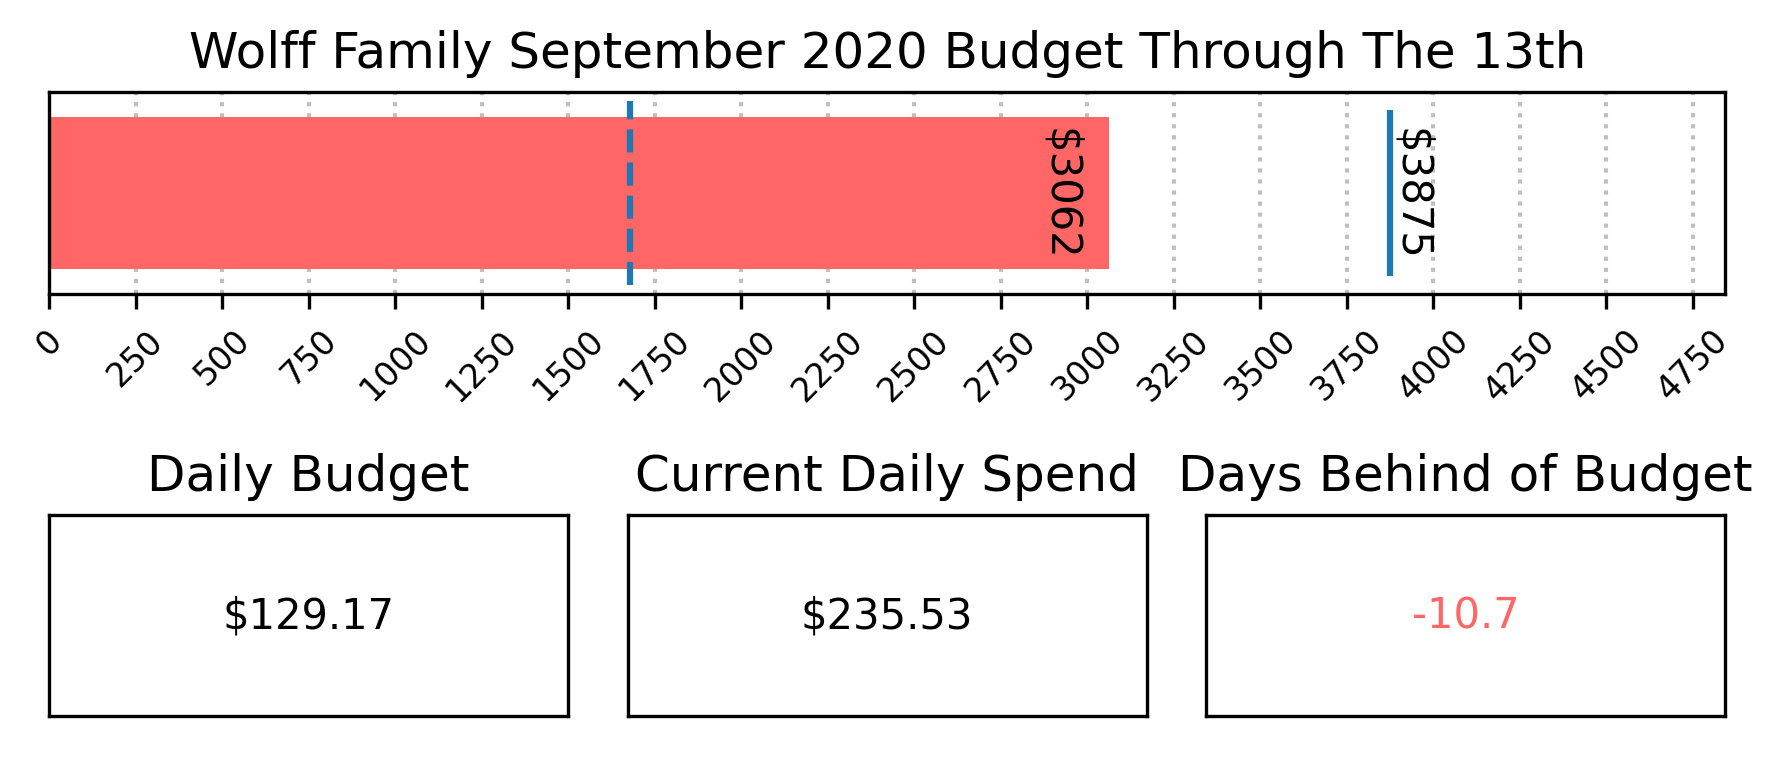

In [11]:
make_chart_and_email()